# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import os
os.chdir('/content/drive/MyDrive/2025-Kovalev-TimeSeriesCourse/practice/05 Snippets')

Импорт библиотек и модулей

In [6]:
!pip install stumpy

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

ModuleNotFoundError: No module named 'matrixprofile'

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

In [8]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

NameError: name 'signal' is not defined

In [ ]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

[autoreload of modules.snippets failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/drive/MyDrive/2023-Bastrykina-TimeSeriesCourse/practice/05 Snippets/modules/snippets.py", line 3, in <module>
    from matrixprofile import core
ModuleNotFoundError: No module named 'matrixprofile'
]


ValueError: ignored

600


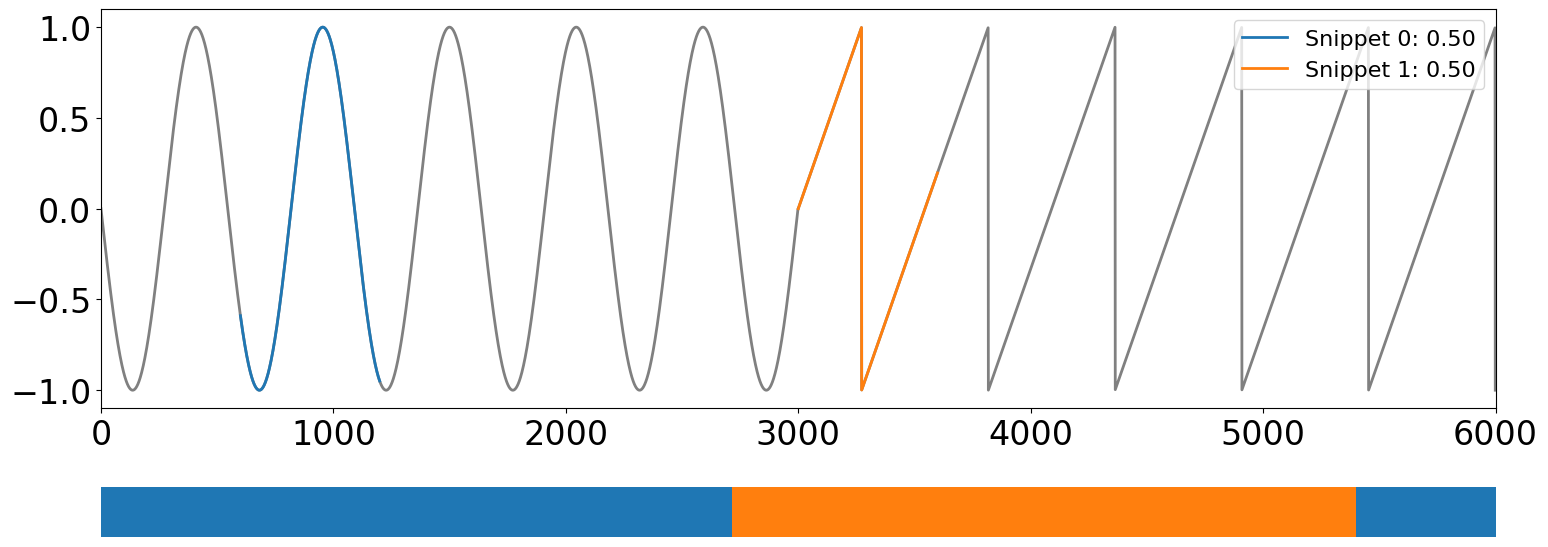

<Axes: >

In [ ]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 1090 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T

In [ ]:
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
snp = snippets(ts, 500, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

500


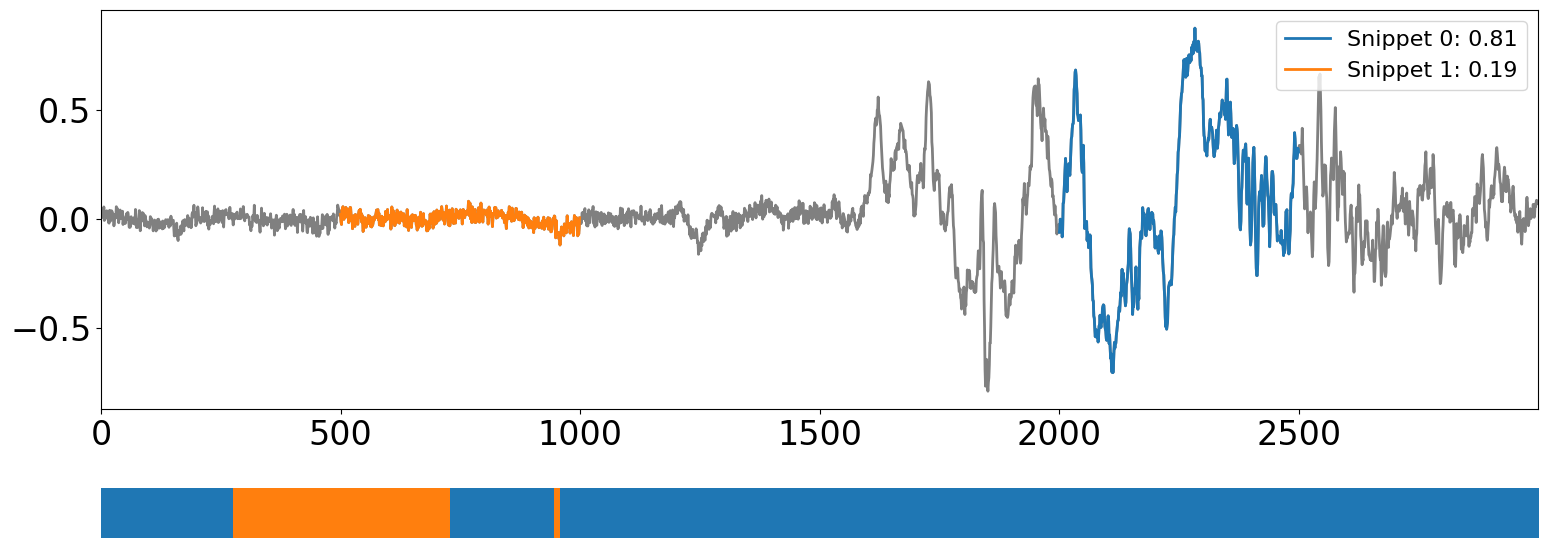

<Axes: >

In [ ]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [ ]:
from sklearn.metrics import accuracy_score

# get predicted labels (from plot_snippets)
labels_pred = np.zeros_like(ts)
for i, snippet in enumerate(snp):
    neighbors = np.array(snippet["neighbors"])
    for neighbor_index in neighbors:
        labels_pred[neighbor_index] = i

# get true labels
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

accuracy_score(labels, labels_pred)

0.6548849616538847

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Поиск сниппетов позволяет делать кластеризацию во временных рядах